# Low level Implementation of feed forward neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nclass = 500

In [3]:
X1 = np.random.randn(nclass, 2) + np.array([0, -2])
X2 = np.random.randn(nclass, 2) + np.array([2, 2])
X3 = np.random.randn(nclass, 2) + np.array([-2, 2])

In [4]:
X = np.vstack([X1, X2, X3])

In [5]:
Y = np.array([0] * nclass + [1] * nclass + [2] * nclass)

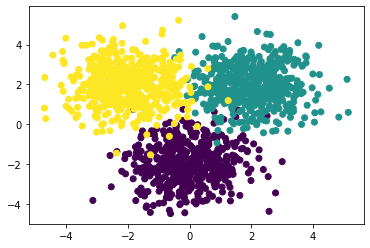

In [6]:
plt.scatter(X[:, 0], X[:,1], c=Y)

In [7]:
D = 2  # number of dimensions
M = 3  # hidden layer size
K = 3  # number of classes -> output layer size

In [8]:
# initialize the weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

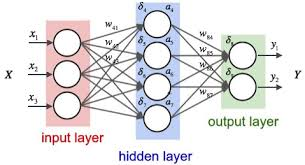

In [9]:
# define the forward action
# first calculate Z (state after hidden layer) -> then p(Y=k|X)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1)) # value at the hidden layer -> sigmoid
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)  # value at output layer -> softmax
    
    return Y, Z

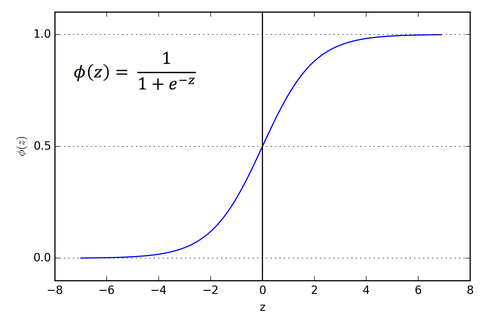

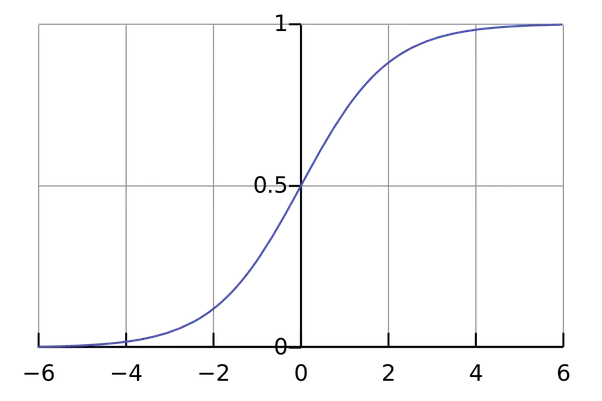

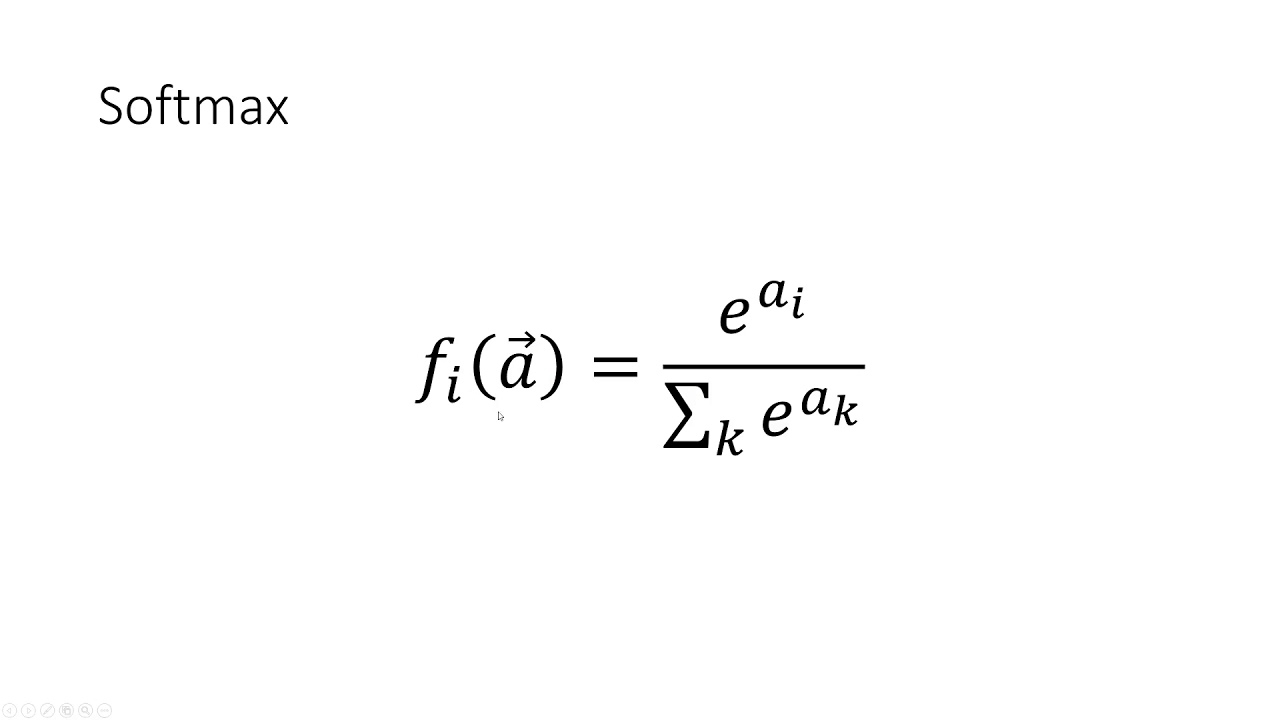

In [10]:
def classification_rate(Y, P):
    n_correct = 0
    for i in range(len(Y)):
           if Y[i] == P[i]:
                n_correct += 1
    return float(n_correct)/len(Y)

In [11]:
P_Y_given_X, _ = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

assert(len(P) == len(Y))

In [12]:
print("Classification Rate for randomly chosen weights:", classification_rate(Y,P))

Classification Rate for randomly chosen weights: 0.14733333333333334


In [13]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [14]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
    ## slow
    #ret1 = np.zeros((M, K))
    #for n in range(N):
    #    for m in range(M):
    #        for k in range(K):
    #            ret1[m,k] += (T[n,k] - Y[n, k]) * Z[n, m]
    
    #return ret1
    return Z.T.dot(T-Y)

def derivative_b2(T, Y):
    return (T-Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape
    
    ## slow
    #ret1 = np.zeros((D, M))
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d, m ] += (T[n, k] - Y[n, k]) * W2[m, k] * Z[n, m] * Z[n, m] * (1 - Z[n, m]) * X[n, d]
                    
    #return ret1
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


In [15]:
N = len(Y)

# true labels "one-hot encoded"
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

In [16]:
learning_rate = 10e-7
costs = []

for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)
        
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

cost: -3811.5365389185995 classification_rate: 0.14733333333333334
cost: -3670.9420183976063 classification_rate: 0.158
cost: -3536.528869229338 classification_rate: 0.18266666666666667
cost: -3410.494921961802 classification_rate: 0.47
cost: -3294.1592922294312 classification_rate: 0.598
cost: -3187.672993484436 classification_rate: 0.6153333333333333
cost: -3090.2345675444903 classification_rate: 0.614
cost: -3000.557325855494 classification_rate: 0.6146666666666667
cost: -2917.2707050537615 classification_rate: 0.618
cost: -2839.138217053044 classification_rate: 0.62
cost: -2765.129991659792 classification_rate: 0.624
cost: -2694.419937832674 classification_rate: 0.6246666666666667
cost: -2626.355364155311 classification_rate: 0.6293333333333333
cost: -2560.4222231953577 classification_rate: 0.6306666666666667
cost: -2496.214623526324 classification_rate: 0.6333333333333333
cost: -2433.4106517440514 classification_rate: 0.634
cost: -2371.754081253729 classification_rate: 0.635333333

cost: -347.80358174406615 classification_rate: 0.9773333333333334
cost: -346.27865559808856 classification_rate: 0.9773333333333334
cost: -344.7730098283396 classification_rate: 0.9773333333333334
cost: -343.2862353448685 classification_rate: 0.9773333333333334
cost: -341.8179372836081 classification_rate: 0.9773333333333334
cost: -340.3677342635336 classification_rate: 0.9773333333333334
cost: -338.93525769384553 classification_rate: 0.9773333333333334
cost: -337.52015112731135 classification_rate: 0.9773333333333334
cost: -336.1220696562186 classification_rate: 0.9766666666666667
cost: -334.740679347689 classification_rate: 0.9766666666666667
cost: -333.3756567153754 classification_rate: 0.9766666666666667
cost: -332.02668822480126 classification_rate: 0.9766666666666667
cost: -330.6934698298353 classification_rate: 0.9766666666666667
cost: -329.37570653799435 classification_rate: 0.9766666666666667
cost: -328.0731120024546 classification_rate: 0.9766666666666667
cost: -326.785408138

cost: -235.25494453763213 classification_rate: 0.976
cost: -234.80263126822854 classification_rate: 0.976
cost: -234.35337547269688 classification_rate: 0.976
cost: -233.90714689968007 classification_rate: 0.976
cost: -233.46391569396798 classification_rate: 0.976
cost: -233.02365239002995 classification_rate: 0.976
cost: -232.58632790567518 classification_rate: 0.976
cost: -232.15191353583606 classification_rate: 0.976
cost: -231.72038094647428 classification_rate: 0.976
cost: -231.2917021686053 classification_rate: 0.976
cost: -230.86584959243766 classification_rate: 0.976
cost: -230.44279596162644 classification_rate: 0.976
cost: -230.02251436763746 classification_rate: 0.976
cost: -229.60497824421878 classification_rate: 0.976
cost: -229.19016136197828 classification_rate: 0.976
cost: -228.77803782306464 classification_rate: 0.976
cost: -228.36858205594896 classification_rate: 0.976
cost: -227.9617688103051 classification_rate: 0.976
cost: -227.55757315198667 classification_rate: 0

cost: -188.97421740664714 classification_rate: 0.976
cost: -188.78415727404186 classification_rate: 0.976
cost: -188.59496135174197 classification_rate: 0.976
cost: -188.40662395877104 classification_rate: 0.976
cost: -188.2191394634158 classification_rate: 0.976
cost: -188.03250228269337 classification_rate: 0.976
cost: -187.84670688182683 classification_rate: 0.976
cost: -187.66174777372564 classification_rate: 0.976
cost: -187.47761951847468 classification_rate: 0.976
cost: -187.29431672282766 classification_rate: 0.976
cost: -187.11183403970944 classification_rate: 0.976
cost: -186.93016616772258 classification_rate: 0.976
cost: -186.74930785066147 classification_rate: 0.976
cost: -186.56925387703245 classification_rate: 0.976
cost: -186.38999907957958 classification_rate: 0.976
cost: -186.21153833481713 classification_rate: 0.976
cost: -186.0338665625668 classification_rate: 0.976
cost: -185.85697872550224 classification_rate: 0.976
cost: -185.6808698286987 classification_rate: 0.

cost: -166.9227684077803 classification_rate: 0.976
cost: -166.82108188942829 classification_rate: 0.976
cost: -166.71974650888933 classification_rate: 0.976
cost: -166.61876052897844 classification_rate: 0.976
cost: -166.51812222375744 classification_rate: 0.976
cost: -166.41782987844394 classification_rate: 0.976
cost: -166.31788178932197 classification_rate: 0.976
cost: -166.21827626365308 classification_rate: 0.976
cost: -166.11901161958838 classification_rate: 0.976
cost: -166.0200861860812 classification_rate: 0.976
cost: -165.92149830280104 classification_rate: 0.976
cost: -165.8232463200483 classification_rate: 0.976
cost: -165.72532859866902 classification_rate: 0.976
cost: -165.62774350997165 classification_rate: 0.9753333333333334
cost: -165.5304894356437 classification_rate: 0.9753333333333334
cost: -165.43356476766968 classification_rate: 0.9753333333333334
cost: -165.33696790824916 classification_rate: 0.9753333333333334
cost: -165.2406972697169 classification_rate: 0.975

cost: -156.13248747649598 classification_rate: 0.9753333333333334
cost: -156.06507994954137 classification_rate: 0.9753333333333334
cost: -155.99786734235659 classification_rate: 0.9753333333333334
cost: -155.9308488491714 classification_rate: 0.9753333333333334
cost: -155.8640236685451 classification_rate: 0.9753333333333334
cost: -155.79739100333796 classification_rate: 0.9753333333333334
cost: -155.73095006068235 classification_rate: 0.9753333333333334
cost: -155.6647000519548 classification_rate: 0.9753333333333334
cost: -155.5986401927475 classification_rate: 0.9753333333333334
cost: -155.5327697028405 classification_rate: 0.9753333333333334
cost: -155.46708780617408 classification_rate: 0.9753333333333334
cost: -155.40159373082102 classification_rate: 0.9753333333333334
cost: -155.33628670895968 classification_rate: 0.9753333333333334
cost: -155.27116597684665 classification_rate: 0.9753333333333334
cost: -155.20623077479013 classification_rate: 0.9753333333333334
cost: -155.1414

cost: -148.99727155254004 classification_rate: 0.9753333333333334
cost: -148.9491260647485 classification_rate: 0.9753333333333334
cost: -148.9011009848312 classification_rate: 0.9753333333333334
cost: -148.8531958814132 classification_rate: 0.9753333333333334
cost: -148.80541032511752 classification_rate: 0.9753333333333334
cost: -148.75774388855407 classification_rate: 0.9753333333333334
cost: -148.71019614630814 classification_rate: 0.9753333333333334
cost: -148.66276667492923 classification_rate: 0.9753333333333334
cost: -148.61545505291963 classification_rate: 0.9753333333333334
cost: -148.5682608607237 classification_rate: 0.9753333333333334
cost: -148.52118368071632 classification_rate: 0.9753333333333334
cost: -148.47422309719246 classification_rate: 0.9753333333333334
cost: -148.42737869635585 classification_rate: 0.9753333333333334
cost: -148.38065006630845 classification_rate: 0.9753333333333334
cost: -148.3340367970395 classification_rate: 0.9753333333333334
cost: -148.2875

cost: -143.79218539766782 classification_rate: 0.9753333333333334
cost: -143.75628772575666 classification_rate: 0.9753333333333334
cost: -143.72046902897307 classification_rate: 0.9753333333333334
cost: -143.68472905705516 classification_rate: 0.9753333333333334
cost: -143.64906756076243 classification_rate: 0.9753333333333334
cost: -143.61348429187063 classification_rate: 0.9753333333333334
cost: -143.5779790031666 classification_rate: 0.9753333333333334
cost: -143.54255144844336 classification_rate: 0.9753333333333334
cost: -143.50720138249505 classification_rate: 0.9753333333333334
cost: -143.4719285611117 classification_rate: 0.9753333333333334
cost: -143.43673274107468 classification_rate: 0.9753333333333334
cost: -143.40161368015126 classification_rate: 0.9753333333333334
cost: -143.36657113709003 classification_rate: 0.9753333333333334
cost: -143.331604871616 classification_rate: 0.9753333333333334
cost: -143.29671464442563 classification_rate: 0.9753333333333334
cost: -143.261

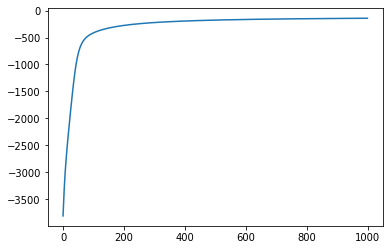

In [17]:
plt.plot(costs)